<a href="https://colab.research.google.com/github/shubham-datascience/the-spark-foundation-internship/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARK FOUNDATION INTERNSHIP**                                       
AUTHOR : SHUBHAM SINGH                                                    
TOPIC : Prediction using Unsupervised ML                                    
TASK :From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [6]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [9]:
df=pd.read_csv("Iris.csv")

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.shape

(150, 6)

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df=df.drop(['Id'],axis=1)

In [14]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# creating array x for processing purpose

In [16]:
x= iris_df.values[ :,:-1]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

model based on kmeans clustering

In [18]:
from sklearn.cluster import KMeans

list to store within sum of sq error

In [27]:
store=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters= i, random_state=10)
    kmeans.fit(x)
    store.append(kmeans.inertia_)

plotting of numbers of clusters vs store


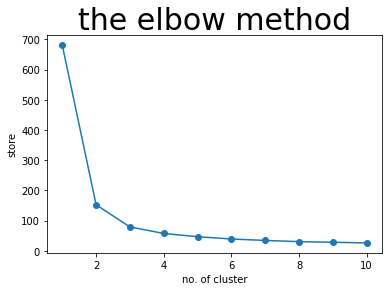

In [29]:
plt.plot(range(1,11), store)
plt.scatter(range(1,11), store)
plt.title('the elbow method',size=30)
plt.xlabel('no. of cluster')
plt.ylabel('store')
plt.show()

In [30]:
kmeans= KMeans(n_clusters= 3, random_state=10)
y_pred=kmeans.fit_predict(x)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [32]:
iris_df["Predicted"]=y_pred
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


mapping the predicted result with actual names


In [33]:
iris_df.Predicted=iris_df.Predicted.map({0:"Iris-versicolor",1:"Iris-setosa",2:"Iris-virginica"})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


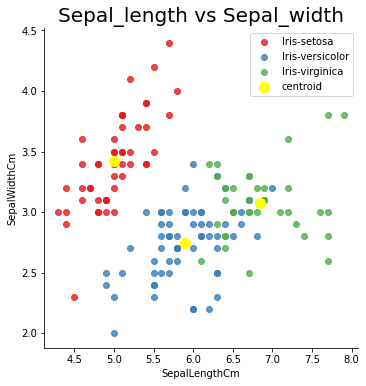

In [39]:
sns.lmplot(data=iris_df, x="SepalLengthCm",y="SepalWidthCm",fit_reg=False,hue="Predicted",palette="Set1",legend=False)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="Yellow",s=100,label="centroid")
plt.title('Sepal_length vs Sepal_width',size=20)
plt.legend()
plt.show()